<a href="https://colab.research.google.com/github/karishita/ML_Project2_ForestCover/blob/main/ForestDataset_Preprocessing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest.
Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data.  Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data.  Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).
This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.  These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.
Given is the attribute name, attribute type, the measurement unit and a brief description.  The forest cover type is the classification  problem.  The order of this listing corresponds to the order of numerals along the rows of the database.



Name / Data Type / Measurement / Description



Elevation / quantitative /meters / Elevation in meters

Aspect / quantitative / azimuth / Aspect in degrees azimuth

Slope / quantitative / degrees / Slope in degrees

Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway

Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice

Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice

Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation

Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation

Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

Class Labels

Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood/Willow, Aspen, Douglas-fir, Krummholz


Wilderness Areas:  	1 -- Rawah Wilderness Area
                        2 -- Neota Wilderness Area
                        3 -- Comanche Peak Wilderness Area
                        4 -- Cache la Poudre Wilderness Area

Forest Cover Type Classes:	1 -- Spruce/Fir
                                2 -- Lodgepole Pine
                                3 -- Ponderosa Pine
                                4 -- Cottonwood/Willow
                                5 -- Aspen
                                6 -- Douglas-fir
                                7 -- Krummholz


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/covtype.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
pd.set_option('display.max_columns', None)
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


# Soil Type

Each row belong to exactly 1 soil type

So merging the 40 columns into 1 column with 40 categories for reducing dimensionality

In [ ]:
soil_cols = [f"Soil_Type{i}" for i in range(1, 41)]

df["soil_sum"] = df[soil_cols].sum(axis=1)

df["soil_sum"].unique()


array([1])

In [ ]:

df["soil_type"] = df[soil_cols].idxmax(axis=1)
df["soil_type"] = df["soil_type"].str.extract("(\d+)").astype(int)
df.drop(columns=["soil_sum"], inplace=True)



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1864654384.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["soil_type"] = df["soil_type"].str.extract("(\d+)").astype(int)


In [ ]:
df.drop(columns=soil_cols, inplace=True)

#Wilderness Area

Each row belongs to 1 wilderness area. Combining the 4 columns into 1 column with 4 categories

In [ ]:
w_cols = [f"Wilderness_Area{i}" for i in range(1, 5)]

df["Wilderness_sum"] = df[w_cols].sum(axis=1)

df["Wilderness_sum"].unique()

array([1])

In [ ]:
df["wilderness_area"] = df[w_cols].idxmax(axis=1)
df["wilderness_area"] = df["wilderness_area"].str.extract(r"(\d+)").astype(int)
df.drop(columns=["Wilderness_sum"], inplace=True)


In [ ]:
df.drop(columns=w_cols,inplace=True)

In [ ]:
#Changing soil type and wilderness area  and cover type to categorical
df['soil_type']=df['soil_type'].astype('category')
df['wilderness_area']=df['wilderness_area'].astype('category');

In [ ]:
df['Cover_Type']=df['Cover_Type'].astype('int64')

In [ ]:
df.to_csv("covtype_clean.csv",index=False)

#Preprocessing and EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/covtype_clean.csv')

In [ ]:
df_copy=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Cover_Type                          581012 non-null  int64
 11  soil_type                           581012 non-null 

In [ ]:
df[['Elevation', 	'Aspect' ,	'Slope', 	'Horizontal_Distance_To_Hydrology', 	'Vertical_Distance_To_Hydrology', 	'Horizontal_Distance_To_Roadways', 	'Hillshade_9am', 	'Hillshade_Noon',	'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


**Correlation**

The Pearson correlation heatmap shows that no single feature has a strong linear relationship with the target variable. The highest correlations are with Elevation, Wilderness Area,Slope, Soil Type, Horizontal_Distance_To_Roadways while most other features show weak positive or negative correlation.

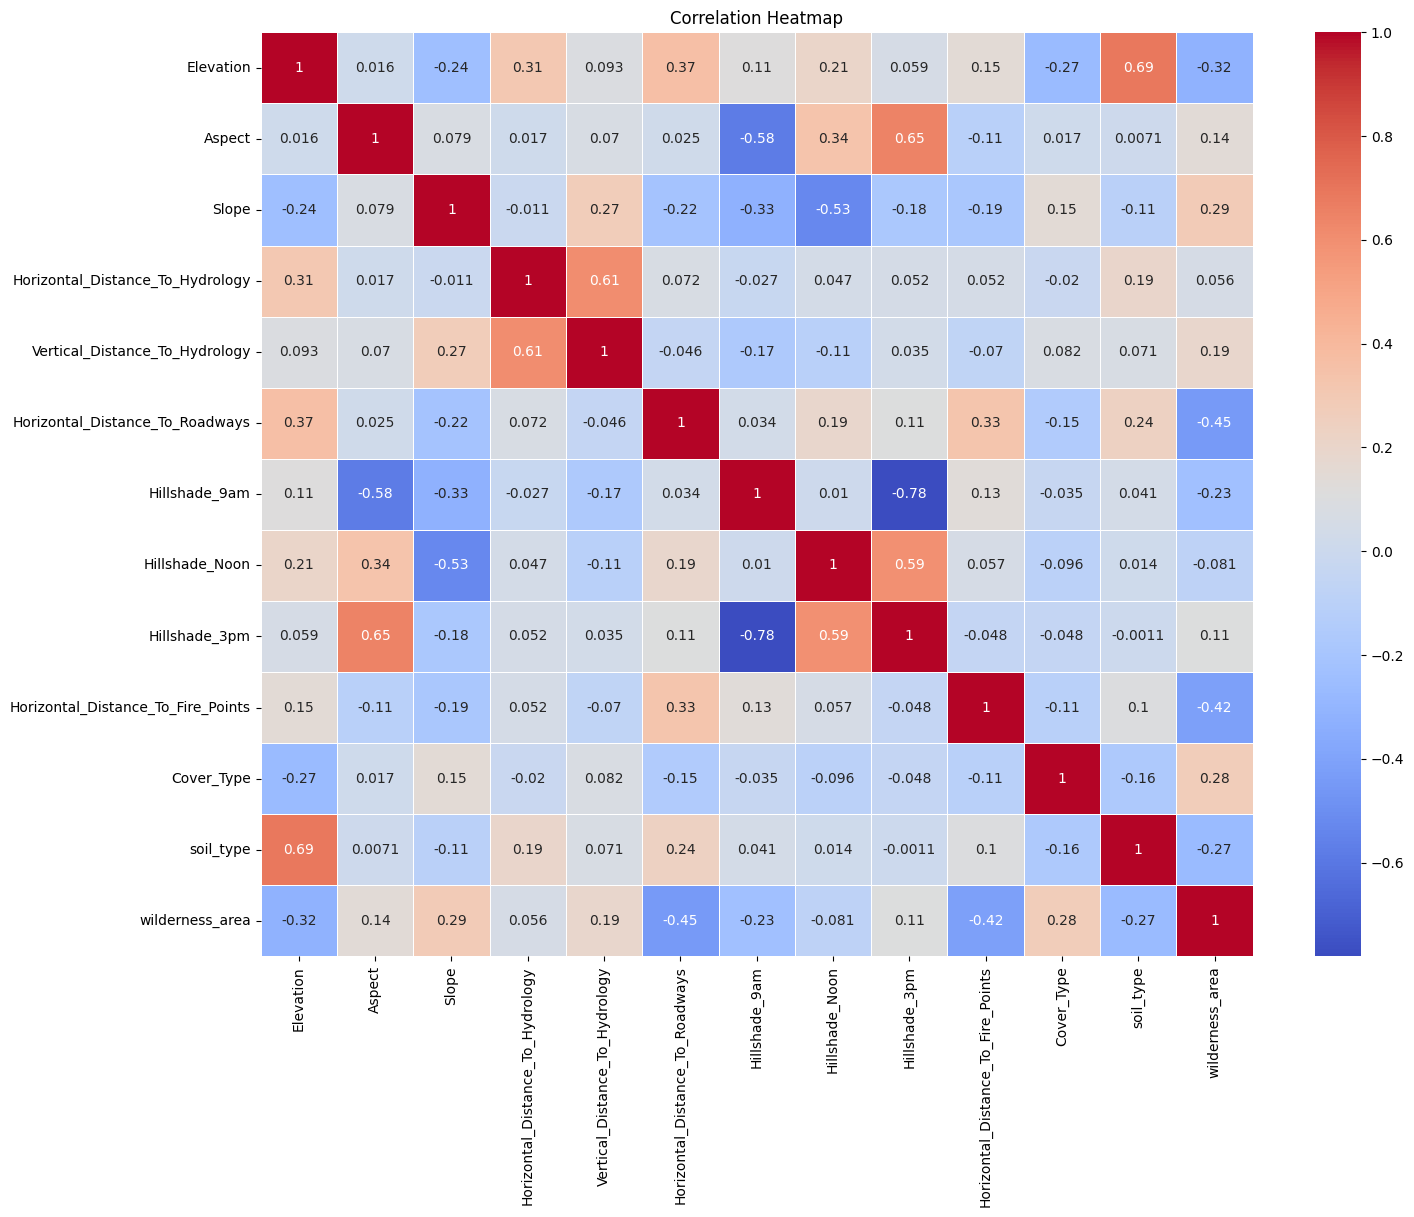

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(16,12));
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_with_target = df.corr()["Cover_Type"].sort_values(ascending=False)
print(corr_with_target)

Cover_Type                            1.000000
wilderness_area                       0.275464
Slope                                 0.148285
Vertical_Distance_To_Hydrology        0.081664
Aspect                                0.017080
Horizontal_Distance_To_Hydrology     -0.020317
Hillshade_9am                        -0.035415
Hillshade_3pm                        -0.048290
Hillshade_Noon                       -0.096426
Horizontal_Distance_To_Fire_Points   -0.108936
Horizontal_Distance_To_Roadways      -0.153450
soil_type                            -0.164337
Elevation                            -0.269554
Name: Cover_Type, dtype: float64


**PCA and t-SNE**

PCA and t-SNE have been used for reducing the dimension to 2 for visualization. It can be seen that the classes in cover_type(target) are not linearly separable. Also many classes overlap and boundary between them are fuzzy. Many forest cover types share similar combination of terrain features .

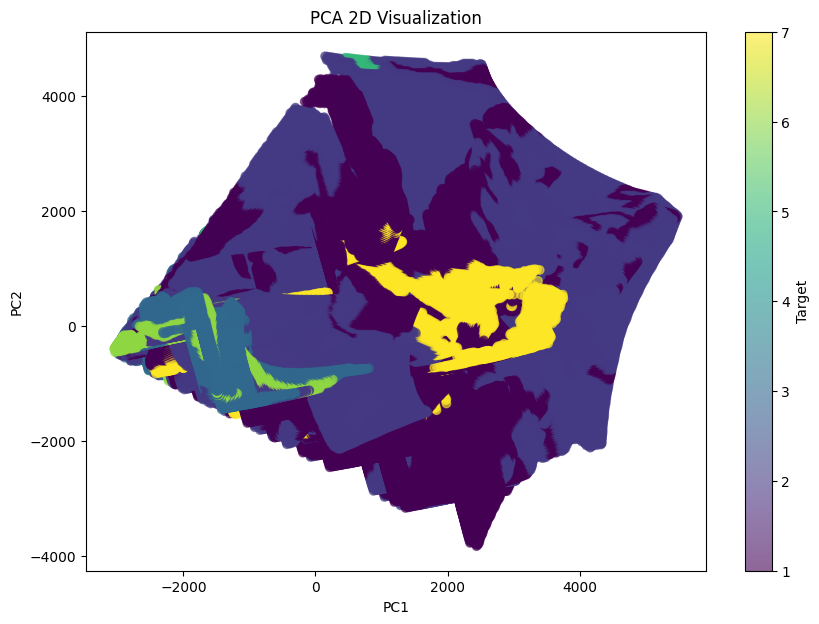

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop("Cover_Type", axis=1))

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cover_Type"], cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Visualization")
plt.colorbar(label="Target")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


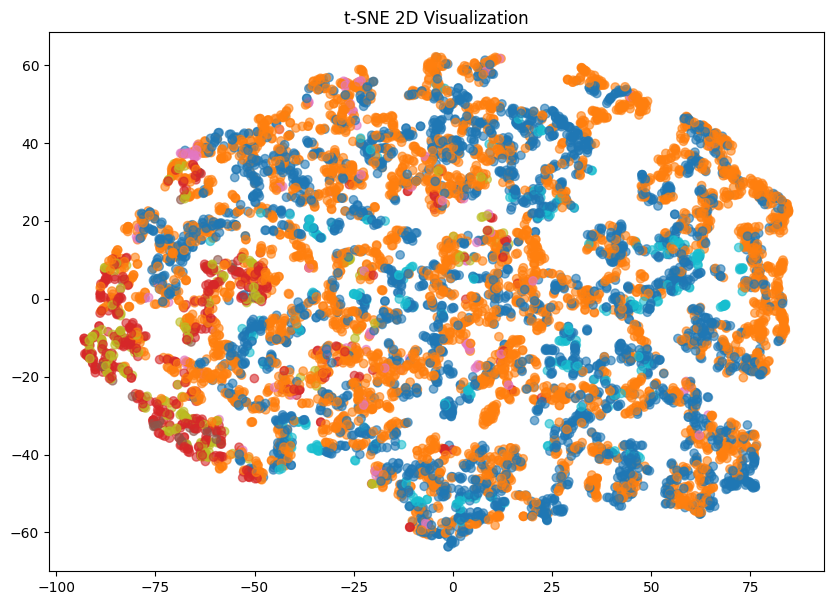

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, n_iter=1000)

X_sample = df.sample(8000)  # reduce data size
X_tsne = tsne.fit_transform(X_sample.drop("Cover_Type", axis=1))

plt.figure(figsize=(10,7))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=X_sample["Cover_Type"], cmap='tab10', alpha=0.6)
plt.title("t-SNE 2D Visualization")
plt.show()


In [ ]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type,wilderness_area
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1


##Target variable analysis

The class distribution analysis reveals that the dataset suffers from severe class imbalance. Cover Type 2 (Lodgepole Pine) is the dominant class, accounting for approximately 48.76% of the total samples, followed by Cover Type 1 (Spruce/Fir) at 36.46%. In contrast, Cover Type 4 (Cottonwood/Willow) represents only 0.47% of the data, making it the most underrepresented class. Other minority classes include Aspen (1.63%), Douglas-fir (2.99%), and Krummholz (3.53%). This extreme imbalance can bias machine learning models toward majority classes and severely impact minority class prediction. To address this issue, stratified sampling, SMOTE-based oversampling, and class-weighted learning has been used during model training .

In [ ]:
class_counts = df['Cover_Type'].value_counts().sort_index()
print(class_counts)


Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


In [ ]:
class_percent = df['Cover_Type'].value_counts(normalize=True).sort_index() * 100
print(class_percent)


Cover_Type
1    36.460521
2    48.759922
3     6.153746
4     0.472796
5     1.633873
6     2.989095
7     3.530048
Name: proportion, dtype: float64


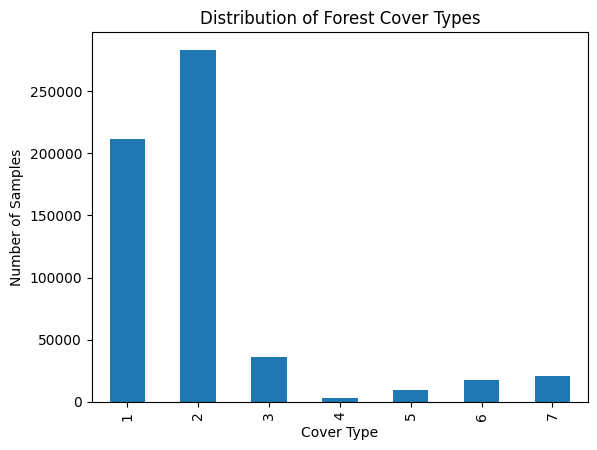

In [ ]:

class_counts.plot(kind='bar')
plt.xlabel("Cover Type")
plt.ylabel("Number of Samples")
plt.title("Distribution of Forest Cover Types")
plt.show()


Univariate Analysis

In [ ]:
features = [
    "Elevation",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm"
]


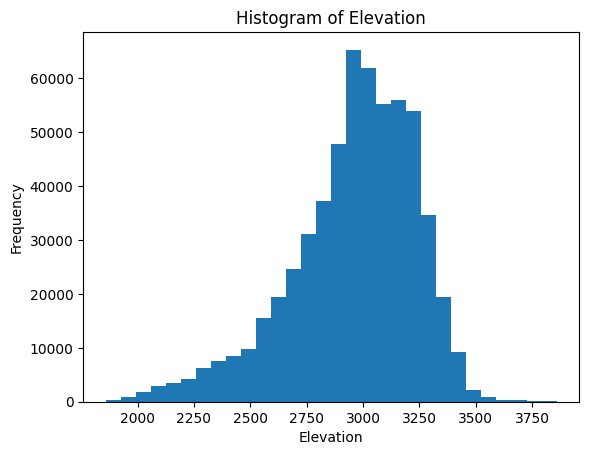

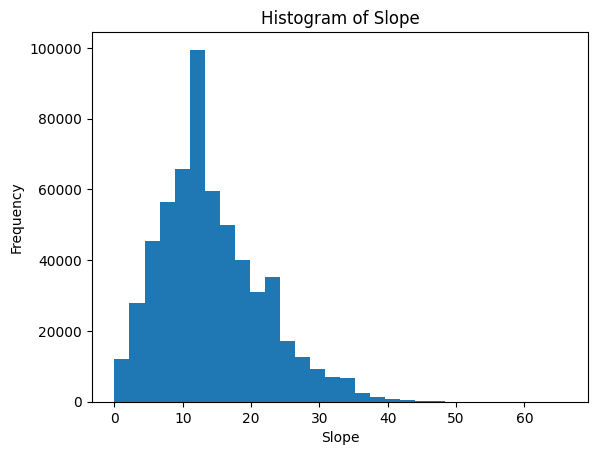

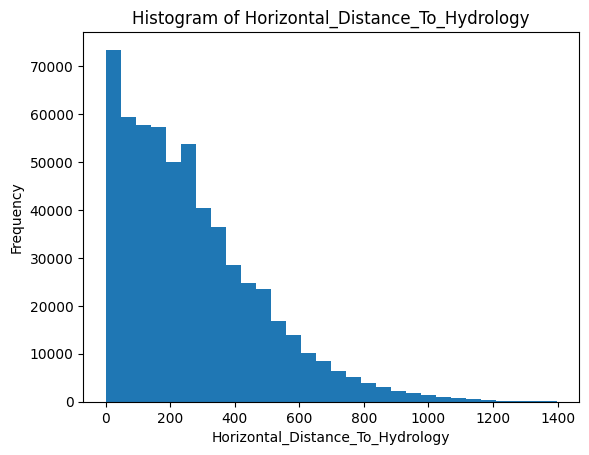

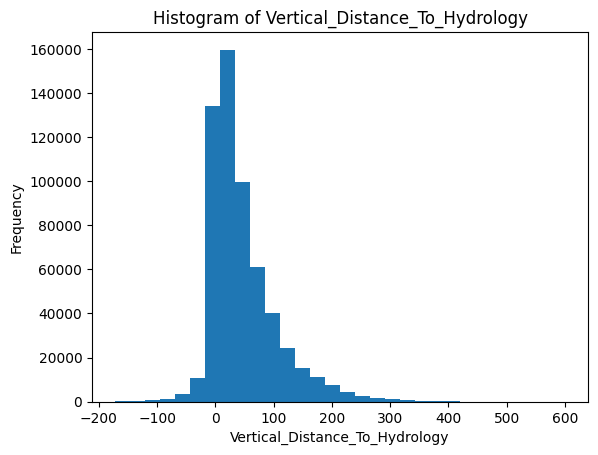

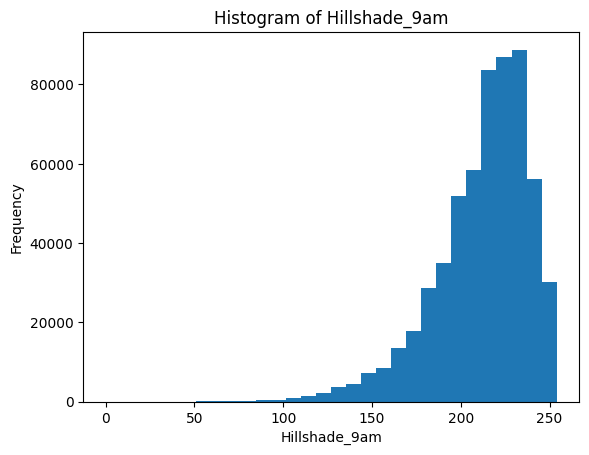

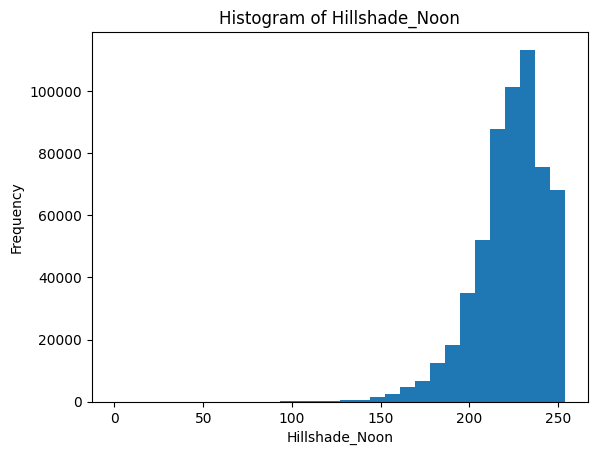

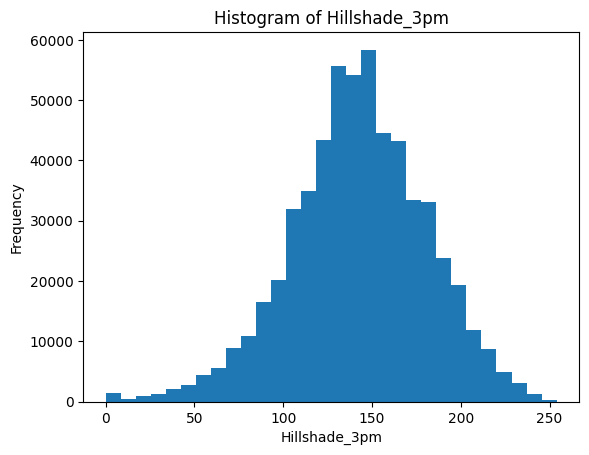

In [ ]:
import matplotlib.pyplot as plt

for feature in features:
    plt.figure()
    plt.hist(df[feature], bins=30)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")
    plt.show()


## Bivariate Analysis

Elevation vs Cover Type

 A clear stratification of forest types along the elevation gradient is observed. Krummholz (Class 7) and Spruce/Fir (Class 1) occur predominantly at higher elevations, indicating their strong association with cold, high-altitude environments. Lodgepole Pine (Class 2) is distributed across moderately high elevations, whereas Ponderosa Pine (Class 3) and Douglas-fir (Class 6) are mainly concentrated at lower to mid-elevation ranges.

Cottonwood/Willow (Class 4) exhibits the lowest elevation range among all classes, reflecting its preference for low-lying riparian zones. Aspen (Class 5) is observed at intermediate elevations with comparatively lower variability. The presence of several outliers across classes highlights localized terrain variations.

These results confirm that elevation is a highly discriminatory cartographic feature and serves as a major ecological driver governing forest cover distribution in the study area.


<Figure size 640x480 with 0 Axes>

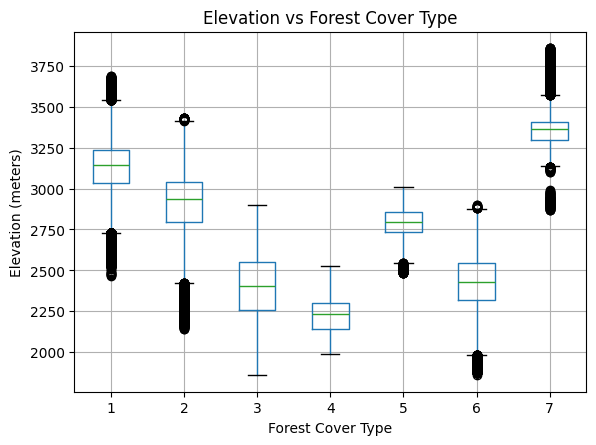

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column="Elevation", by="Cover_Type")
plt.xlabel("Forest Cover Type")
plt.ylabel("Elevation (meters)")
plt.title("Elevation vs Forest Cover Type")
plt.suptitle("")
plt.show()


Horizontal distance to hydrology vs cover type

A strong relationship between proximity to water and forest
type is clearly observed. Cottonwood/Willow (Class 4) exhibits the smallest me-
dian distance to hydrological features, with most samples occurring very close to
water sources. This confirms its strong association with riparian environments.
In contrast, forest types such as Lodgepole Pine (Class 2), Krummholz (Class
7), and Spruce/Fir (Class 1) display significantly larger median distances and
wider spreads, indicating weaker dependence on immediate water proximity.
Aspen (Class 5) and Douglas-fir (Class 6) occur at intermediate hydrological
distances.
The presence of several high-distance outliers across multiple classes reflects
natural terrain variability and heterogeneous drainage patterns within the study
region. Overall, these results validate horizontal distance to hydrology as a
highly discriminative feature for forest cover classification

<Figure size 640x480 with 0 Axes>

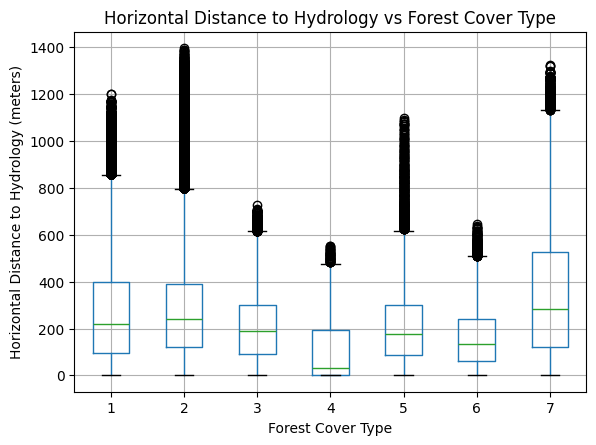

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column="Horizontal_Distance_To_Hydrology", by="Cover_Type")
plt.xlabel("Forest Cover Type")
plt.ylabel("Horizontal Distance to Hydrology (meters)")
plt.title("Horizontal Distance to Hydrology vs Forest Cover Type")
plt.suptitle("")
plt.show()


Slope vs Cover Type

 Distinct slope preferences are observed among the classes. Ponderosa Pine (Class 3), Cottonwood/Willow (Class 4), and Douglas-fir (Class 6) exhibit higher median slope values, indicating a tendency to grow on moderately to steeply sloped terrains.

Spruce/Fir (Class 1), Lodgepole Pine (Class 2), and Krummholz (Class 7) are predominantly concentrated at lower slope ranges, suggesting their preference for relatively gentle terrains. Aspen (Class 5) occupies an intermediate slope range with moderate variability.

Several high-slope outliers are present across nearly all forest types, reflecting natural terrain irregularities such as ridges and steep inclines. Overall, slope demonstrates moderate discriminative power in distinguishing forest cover types based on terrain steepness.


<Figure size 640x480 with 0 Axes>

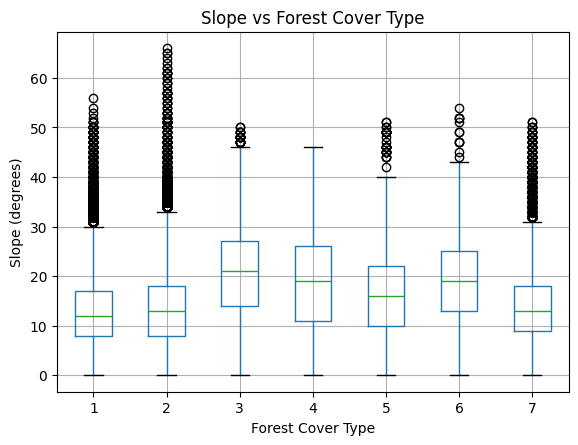

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column="Slope", by="Cover_Type")
plt.xlabel("Forest Cover Type")
plt.ylabel("Slope (degrees)")
plt.title("Slope vs Forest Cover Type")
plt.suptitle("")
plt.show()


Horizontal Distance to Roadways vs Forest Cover Type

Clear differences in accessibility patterns are observed among the
classes. Cottonwood/Willow (Class 4), Ponderosa Pine (Class 3), and Douglas-
fir (Class 6) exhibit smaller median distances to roadways, indicating that these
forest types are more frequently located in relatively accessible regions.
In contrast, Spruce/Fir (Class 1), Lodgepole Pine (Class 2), and Krummholz
(Class 7) show substantially larger median distances and wider spreads, suggest-
ing that these forest types are predominantly found in remote and less accessible
areas. Aspen (Class 5) occupies a moderate range with substantial variability.
The presence of several extreme outliers at high distances reflects naturally
inaccessible mountainous and interior forest regions.

<Figure size 640x480 with 0 Axes>

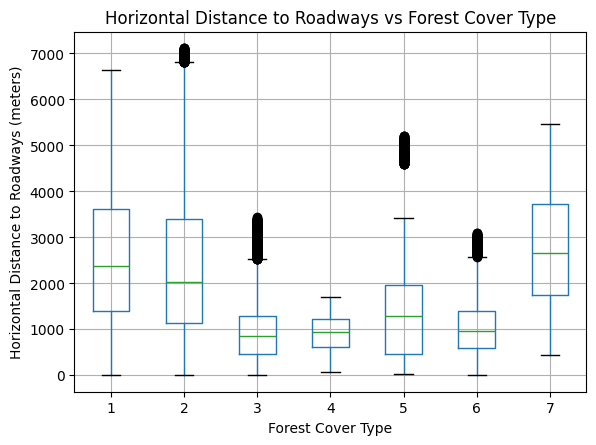

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column="Horizontal_Distance_To_Roadways", by="Cover_Type")
plt.xlabel("Forest Cover Type")
plt.ylabel("Horizontal Distance to Roadways (meters)")
plt.title("Horizontal Distance to Roadways vs Forest Cover Type")
plt.suptitle("")
plt.show()


Wilderness Area vs Forest Cover Type

 A strong geographical specialization of forest types is clearly evident. Lodgepole Pine (Class 2) and
Spruce/Fir (Class 1) dominate Wilderness Areas 1 and 3, indicating that these
regions primarily consist of high-altitude coniferous forests.
Wilderness Area 3 exhibits the highest diversity of forest types, containing
substantial representations of Aspen (Class 5), Douglas-fir (Class 6), Ponderosa
Pine (Class 3), and Krummholz (Class 7). In contrast, Wilderness Area 2
shows a comparatively lower number of samples and is primarily dominated by
Spruce/Fir and Lodgepole Pine.
Wilderness Area 4 displays a distinct vegetation profile characterized by a
strong dominance of Ponderosa Pine (Class 3) and Douglas-fir (Class 6), with
minimal presence of high-altitude forest types. These observations confirm that
wilderness area is a highly influential geographical feature governing forest cover
distribution

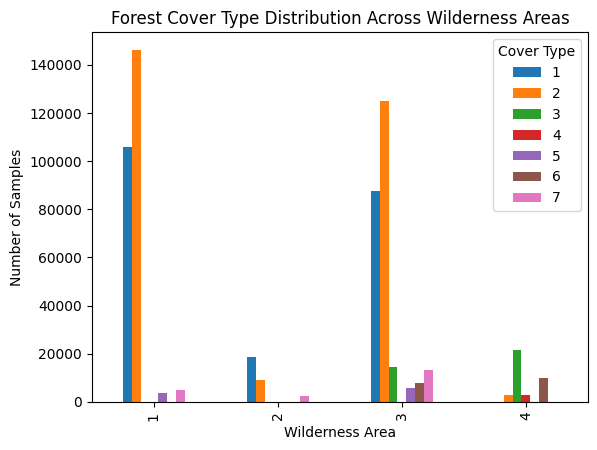

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create frequency table
wilderness_cover_counts = pd.crosstab(
    df["wilderness_area"],
    df["Cover_Type"]
)

# Plot grouped bar chart
wilderness_cover_counts.plot(kind="bar")
plt.xlabel("Wilderness Area")
plt.ylabel("Number of Samples")
plt.title("Forest Cover Type Distribution Across Wilderness Areas")
plt.legend(title="Cover Type")
plt.show()


Soil Type vs Forest Cover


<Figure size 1800x800 with 0 Axes>

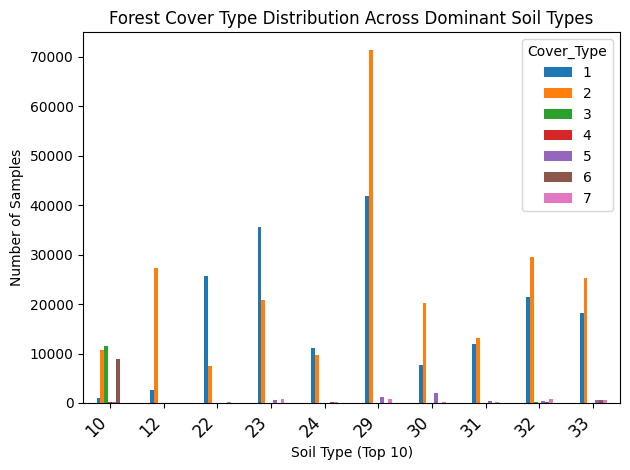

In [ ]:
top_soils = df["soil_type"].value_counts().head(10).index
filtered_df = df[df["soil_type"].isin(top_soils)]

soil_cover_counts = pd.crosstab(
    filtered_df["soil_type"],
    filtered_df["Cover_Type"]
)

plt.figure(figsize=(18, 8))
soil_cover_counts.plot(kind="bar")

plt.xlabel("Soil Type (Top 10)", fontsize=10)
plt.ylabel("Number of Samples", fontsize=10)
plt.title("Forest Cover Type Distribution Across Dominant Soil Types", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()
